##### Кластеризация.
Распределение студентов по типам учебных заведений

In [6]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Загрузка данных
df = pd.read_csv("data/students_education.csv")
df.columns
display(df)
df = df.drop(['Gender', 'IT Student', 'Device', 'Internet Type','Network Type'], axis=1)

# Удаление целевой переменной 'Institution Type'
X = df.drop(['Institution Type'], axis=1)

# Преобразование категориальных переменных
categorical_features = ['Education Level','Location','Financial Condition','Flexibility Level']
numerical_features = ['Age']
display(df)

Education Level Institution Type  Gender  Age  Device IT Student  \
0         University          Private    Male   23     Tab         No   
1         University          Private  Female   23  Mobile         No   
2            College           Public  Female   18  Mobile         No   
3             School          Private  Female   11  Mobile         No   
4             School          Private  Female   18  Mobile         No   
...              ...              ...     ...  ...     ...        ...   
1200         College          Private  Female   18  Mobile         No   
1201         College          Private  Female   18  Mobile         No   
1202          School          Private    Male   11  Mobile         No   
1203         College          Private  Female   18  Mobile         No   
1204          School          Private  Female   11  Mobile         No   

     Location Financial Condition Internet Type Network Type Flexibility Level  
0        Town                 Mid          Wifi           4G          Moderate  
1        Town                 Mid   Mobile Data           4G          Moderate  
2        Town                 Mid          Wifi           4G          Moderate  
3        Town                 Mid   Mobile Data           4G          Moderate  
4        Town                Poor   Mobile Data           3G               Low  
...       ...                 ...           ...          ...               ...  
1200     Town                 Mid          Wifi           4G               Low  
1201    Rural                 Mid          Wifi           4G          Moderate  
1202     Town                 Mid   Mobile Data           3G          Moderate  
1203    Rural                 Mid          Wifi           4G               Low  
1204     Town                Poor   Mobile Data           3G          Moderate  

[1205 rows x 11 columns]

Education Level Institution Type  Age Location Financial Condition  \
0         University          Private   23     Town                 Mid   
1         University          Private   23     Town                 Mid   
2            College           Public   18     Town                 Mid   
3             School          Private   11     Town                 Mid   
4             School          Private   18     Town                Poor   
...              ...              ...  ...      ...                 ...   
1200         College          Private   18     Town                 Mid   
1201         College          Private   18    Rural                 Mid   
1202          School          Private   11     Town                 Mid   
1203         College          Private   18    Rural                 Mid   
1204          School          Private   11     Town                Poor   

     Flexibility Level  
0             Moderate  
1             Moderate  
2             Moderate  
3             Moderate  
4                  Low  
...                ...  
1200               Low  
1201          Moderate  
1202          Moderate  
1203               Low  
1204          Moderate  

[1205 rows x 6 columns]

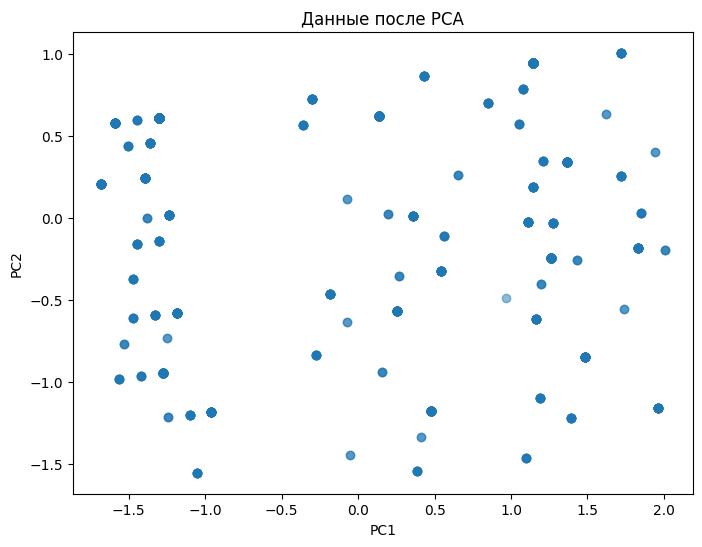

In [7]:
# Создание ColumnTransformer для обработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Преобразование данных
X_scaled = preprocessor.fit_transform(X)

# Понижение размерности с помощью PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализация данных после PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('Данные после PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

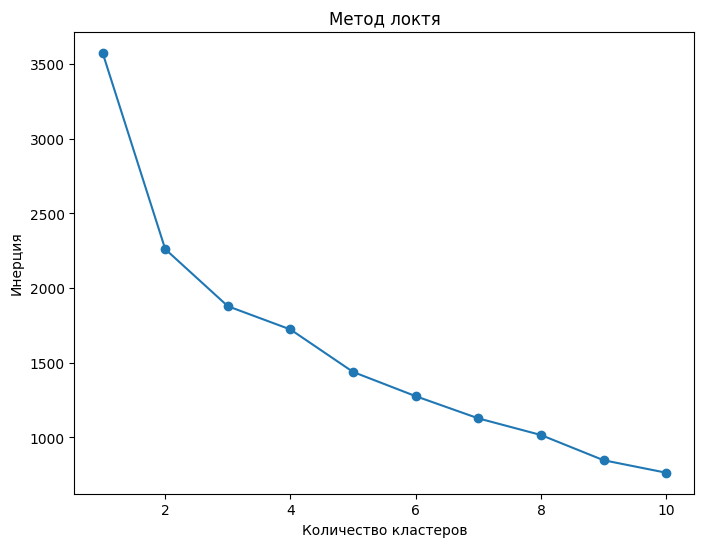

In [8]:
# Определение оптимального количества кластеров с помощью метода локтя
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Визуализация метода локтя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()

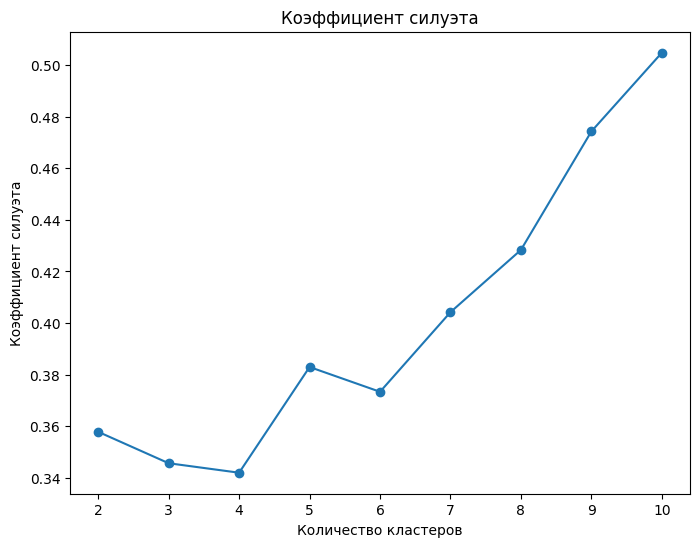

In [9]:
# Определение оптимального количества кластеров с помощью коэффициента силуэта
silhouette_scores = []
for k in range(2, 11):  # Коэффициент силуэта не определен для k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Визуализация коэффициента силуэта
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.show()

In [11]:
# Кластеризация с использованием K-Means
optimal_k = 3  # Выберите оптимальное количество кластеров на основе графиков
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [12]:
# Кластеризация с использованием Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_clustering.fit_predict(X_scaled)

Text(0, 0.5, 'PC2')

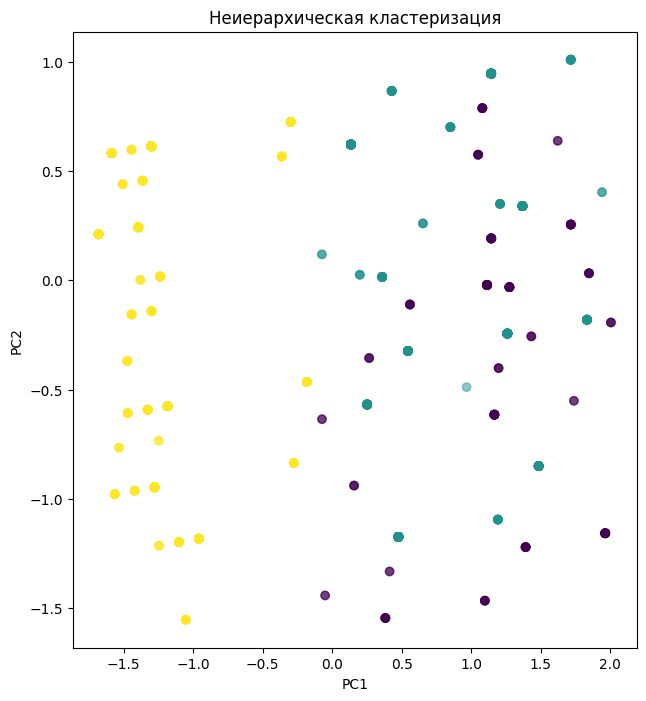

In [17]:
# Визуализация результатов кластеризации
plt.figure(figsize=(16, 8))

# K-Means
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('Неиерархическая кластеризация')
plt.xlabel('PC1')
plt.ylabel('PC2')

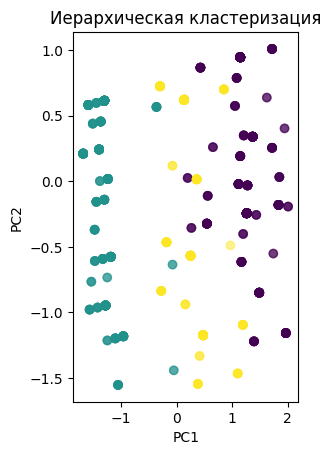

In [20]:
# Agglomerative Clustering
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='viridis', alpha=0.5)
plt.title('Иерархическая кластеризация')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

In [15]:
# Оценка качества кластеризации
print("Коэффициент силуэта для K-Means:", silhouette_score(X_scaled, kmeans_labels))
print("Коэффициент силуэта для Agglomerative Clustering:", silhouette_score(X_scaled, agg_labels))

Коэффициент силуэта для K-Means: 0.3456393814525895
Коэффициент силуэта для Agglomerative Clustering: 0.3584732406902143
